In [19]:
!pip install mlxtend

  Obtaining dependency information for mlxtend from https://files.pythonhosted.org/packages/73/da/d5d77a9a7a135c948dbf8d3b873655b105a152d69e590150c83d23c3d070/mlxtend-0.23.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ----------- ---------------------------- 0.4/1.4 MB 12.5 MB/s eta 0:00:01
   --------------------- ------------------ 0.8/1.4 MB 9.9 MB/s eta 0:00:01
   --------------------------------- ------ 1.2/1.4 MB 9.7 MB/s eta 0:00:01
   ---------------------------------------  1.4/1.4 MB 9.1 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 7.1 MB/s eta 0:00:00


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing,metrics,linear_model
from sklearn.model_selection import cross_val_score,cross_val_predict,train_test_split
from sklearn import metrics
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [45]:
df=pd.read_excel('./OnlineRetail.xlsx')
df.shape

(541909, 8)

In [46]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [47]:
df.head()    

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [48]:
print(f"Distinct entries: {len(df.groupby(['StockCode']))}")

Distinct entries: 4070


## Most Selling Item

<Axes: >

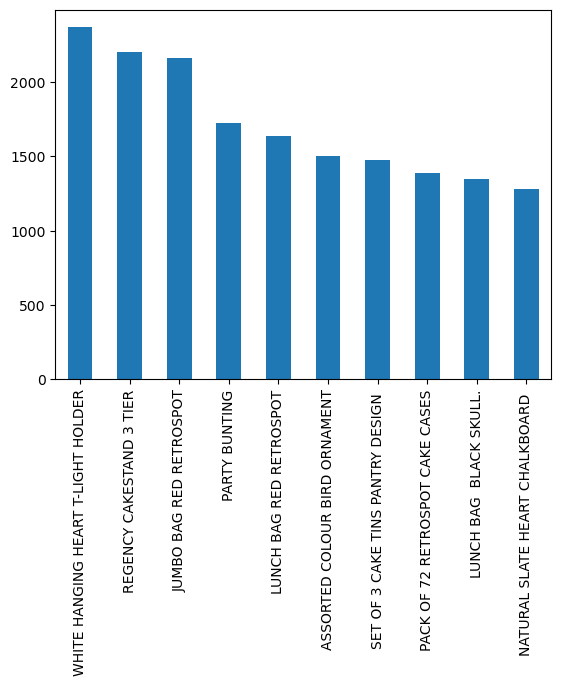

In [49]:
df['Description'].value_counts().sort_values(ascending = False)[:10].plot.bar()

## Cart size

<Axes: >

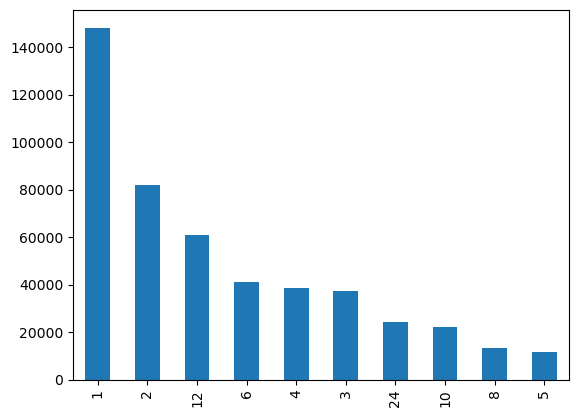

In [50]:
df['Quantity'].value_counts().sort_values(ascending = False)[:10].plot.bar()

In [51]:
df['Description'] = df['Description'].str.strip() 
df.dropna(axis=0, subset=['InvoiceNo'], inplace=True) 
df['InvoiceNo'] = df['InvoiceNo'].astype('str')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


<Axes: >

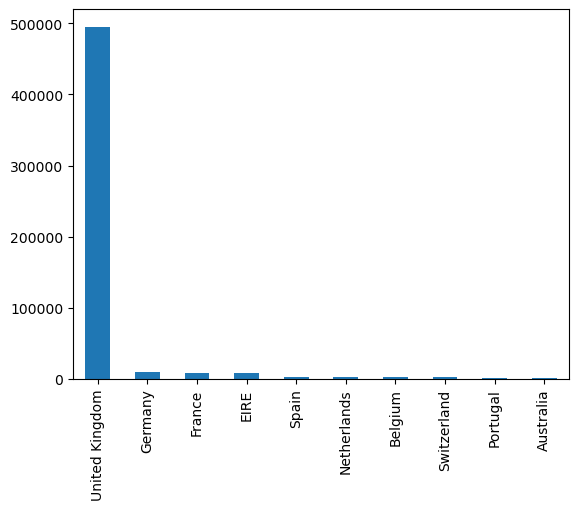

In [52]:
df['Country'].value_counts().sort_values(ascending = False)[:10].plot.bar()

## Analysing Spain

In [95]:
mybasket = (df[df['Country'] =="Spain"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

In [96]:
mybasket.head()

Description,10 COLOUR SPACEBOY PEN,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,20 DOLLY PEGS RETROSPOT,200 RED + WHITE BENDY STRAWS,3 DRAWER ANTIQUE WHITE WOOD CABINET,3 HOOK HANGER MAGIC GARDEN,3 HOOK PHOTO SHELF ANTIQUE WHITE,3 PIECE SPACEBOY COOKIE CUTTER SET,...,WRAP RED APPLES,WRAP RED VINTAGE DOILY,WRAP SUKI AND FRIENDS,"WRAP, BILLBOARD FONTS DESIGN",YELLOW COAT RACK PARIS FASHION,YELLOW FLOWERS FELT HANDBAG KIT,ZINC FOLKART SLEIGH BELLS,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536944,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
538095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
538525,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
539351,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
540469,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0


In [97]:
def encode(x):
    if x <= 0:
        return 0
    else:
        return 1
my_basket_sets=mybasket.applymap(encode)

In [98]:
my_frequent_itemsets = apriori(my_basket_sets, min_support=0.07, use_colnames=True)

D:\Users\SOUVIK\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [99]:
my_rules = association_rules(my_frequent_itemsets, metric="lift", min_threshold=1)

In [100]:
my_rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(6 RIBBONS RUSTIC CHARM),(ASSORTED COLOUR BIRD ORNAMENT),0.142857,0.114286,0.085714,0.600000,5.250000,0.069388,2.214286,0.944444
1,(ASSORTED COLOUR BIRD ORNAMENT),(6 RIBBONS RUSTIC CHARM),0.114286,0.142857,0.085714,0.750000,5.250000,0.069388,3.428571,0.913978
2,(POSTAGE),(6 RIBBONS RUSTIC CHARM),0.590476,0.142857,0.123810,0.209677,1.467742,0.039456,1.084548,0.778175
3,(6 RIBBONS RUSTIC CHARM),(POSTAGE),0.142857,0.590476,0.123810,0.866667,1.467742,0.039456,3.071429,0.371795
4,(POSTAGE),(ASSORTED COLOUR BIRD ORNAMENT),0.590476,0.114286,0.104762,0.177419,1.552419,0.037279,1.076751,0.868922


In [101]:
my_basket_sets['ALARM CLOCK BAKELIKE GREEN'].sum()

7

In [102]:
my_basket_sets['ALARM CLOCK BAKELIKE PINK'].sum()

6

## Recommendation rules for Spain

In [105]:
my_rules[ (my_rules['lift'] >= 3) &
       (my_rules['confidence'] >= 0.7) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1,(ASSORTED COLOUR BIRD ORNAMENT),(6 RIBBONS RUSTIC CHARM),0.114286,0.142857,0.085714,0.750000,5.250000,0.069388,3.428571,0.913978
19,"(POSTAGE, ASSORTED COLOUR BIRD ORNAMENT)",(6 RIBBONS RUSTIC CHARM),0.104762,0.142857,0.085714,0.818182,5.727273,0.070748,4.714286,0.921986
23,(ASSORTED COLOUR BIRD ORNAMENT),"(POSTAGE, 6 RIBBONS RUSTIC CHARM)",0.114286,0.123810,0.085714,0.750000,6.057692,0.071565,3.504762,0.942652
